# Objektorientierung

In [1]:
%mavenRepo bintray https://dl.bintray.com/egp/maven
%maven ch.unibas.informatik:jturtle:0.5

In [2]:
import ch.unibas.informatik.jturtle.Turtle;

## Turtlegrafik mit Klasse

Case Study:

In [12]:
class Point { 
    double x = 0;
    double y = 0;            
    
    public Point(double x, double y) {
        this.x = x;
        this.y = y;
    }        
    
    double getX() { return this.x; }
    double getY() { return this.y; }
}

#### Mini Übung

* Implementieren Sie eine Klasse Vector, nach dem selben Muster wie Point. Es sollen aber zusätzlich die Methoden ```dotprod``` und ```norm``` implementiert werden. 

In [13]:
class Vector { 
    double x = 0;
    double y = 0;
    
    public Vector(double x, double y) {
        this.x = x;
        this.y = y;
    }
    
    double getX() { return this.x; }
    double getY() { return this.y; }
    
    double dotProd(Vector that) { 
        return this.x * that.getX() + this.y * that.getY();
    }
    
    double norm() {
        return Math.sqrt(dotProd(this));
    }
    
}

In [14]:
Vector v1 = new Vector(0, -50);
Vector e1 = new Vector(1, 0);
v1.dotProd(e1);

0.0

In [15]:
class Line {
    Point x0 = null;
    Point x1 = null;
    
    public Line(Point x0, Point x1) {
        this.x0 = x0;
        this.x1 = x1;
    }
    
    void draw(Turtle t) { 
        t.penUp();
        t.home();
        t.forward(this.x0.getY());
        t.turnRight(90);
        t.forward(this.x0.getX());
        t.penDown();
        
        Vector v = new Vector(this.x1.getX() - this.x0.getX(), this.x1.getY() - this.x0.getY());
        Vector e1 = new Vector(1.0, 0.0);
        
        
        // angle is computed from the definition of the dot product (with the unit vector e1)
        double angle = Math.acos(v.dotProd(e1) / (v.norm() * e1.norm())) ;
        System.out.println(angle);
        
        double angleInDegrees = angle * 360 / (Math.PI * 2.0);
        if (v.getY() < 0) {
            t.turnRight(angleInDegrees);
        } else { 
            t.turnLeft(angleInDegrees);
        }
        t.forward(v.norm());
    }
}

1.5707963267948966


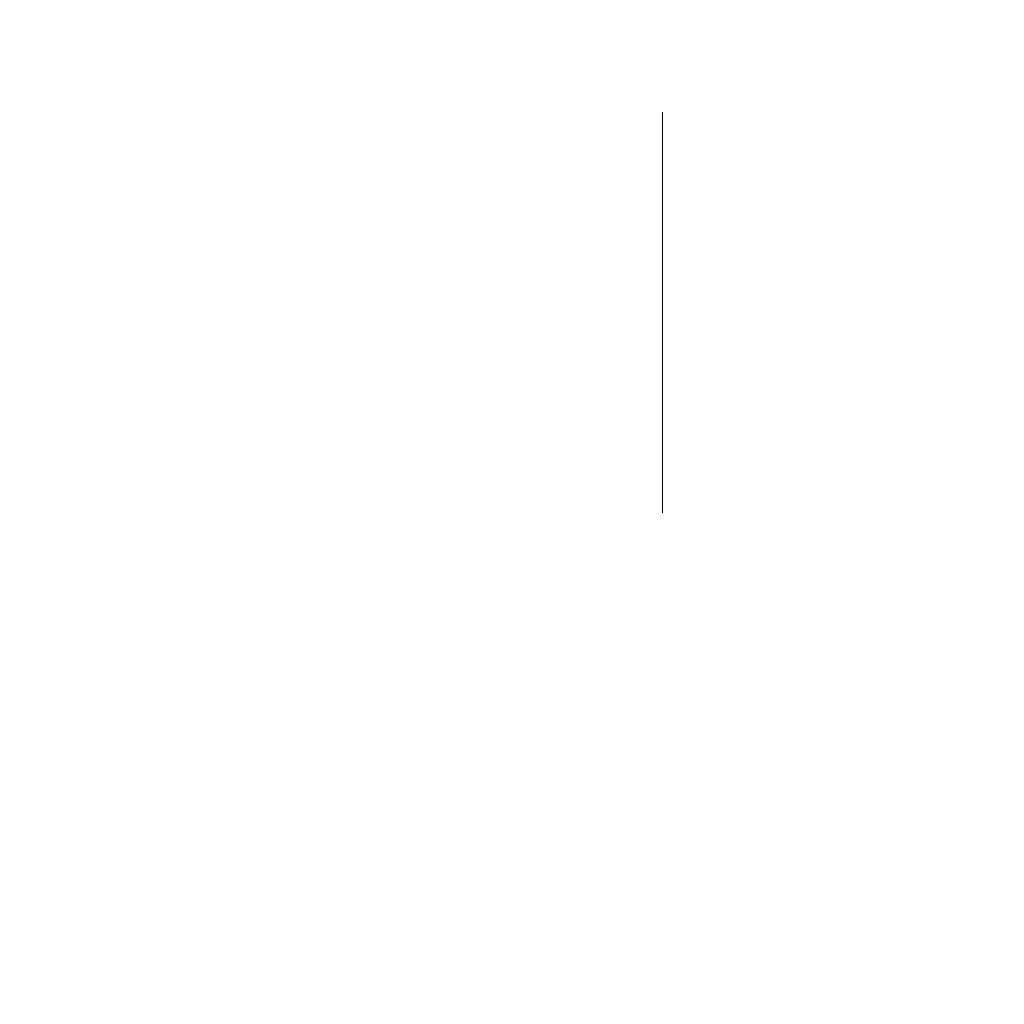

In [8]:
Line line = new Line(new Point(30, 80), new Point(30,0));
Turtle t = new Turtle();
t.penDown();
line.draw(t);
t.toImage();

In [21]:
class Polygone { 

    Point[] points = new Point[100];
    int numbPoints;
    
    Polygone(Point... points) { 
        this.points = points;
    }
    
    public void draw(Turtle turtle) {
        for (int i = 0; i < points.length -1; i++) {
            (new Line(points[i], points[i + 1])).draw(turtle);
        }
    }
}

1.5707963267948966
0.0
1.5707963267948966
3.141592653589793


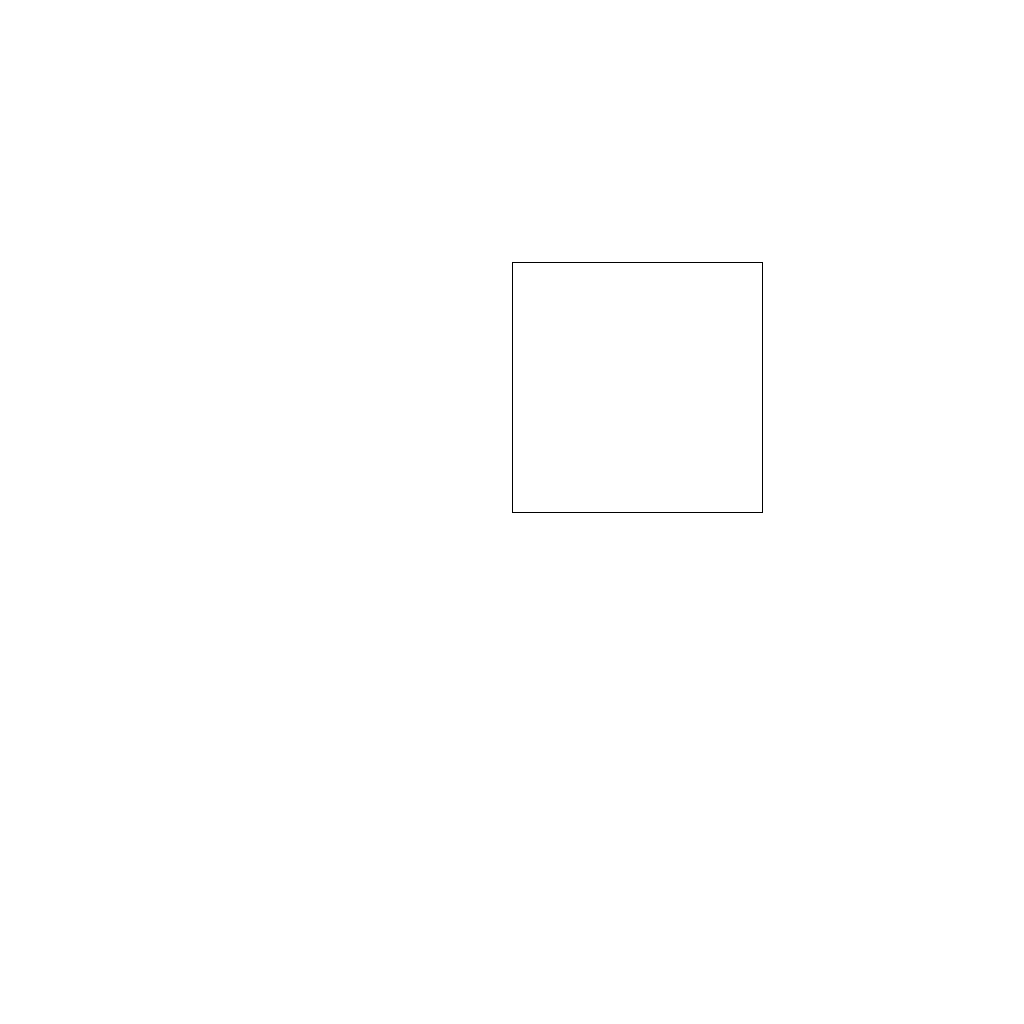

In [23]:
Turtle t = new Turtle();
Polygone p = new Polygone(new Point(0, 0), new Point(0, 50), new Point(50, 50), new Point(50, 0), new Point(0, 0));
p.draw(t);
t.toImage();

In [40]:
class Rectangle {

    Point lowerCorner = null;
    Point oppositeCorner = null;
    
    public Rectangle(Point lowerCorner, Point oppositeCorner) {
        this.lowerCorner = lowerCorner;
        this.oppositeCorner = oppositeCorner;
    }
    
        
    public void draw(Turtle t) {
        Point p1 = this.lowerCorner;
        Point p2 = new Point(lowerCorner.getX(), this.oppositeCorner.getY());
        Point p3 = this.oppositeCorner;
        Point p4 = new Point(oppositeCorner.getX(), lowerCorner.getY());
        
        Line l1 = new Line(p1, p2);
        Line l2 = new Line(p2, p3);
        Line l3 = new Line(p3, p4);
        Line l4 = new Line(p4, p1);
        
        l1.draw(t);
        l2.draw(t);
        l3.draw(t);
        l4.draw(t);
    }

    
}

1.5707963267948966
0.0
1.5707963267948966
3.141592653589793


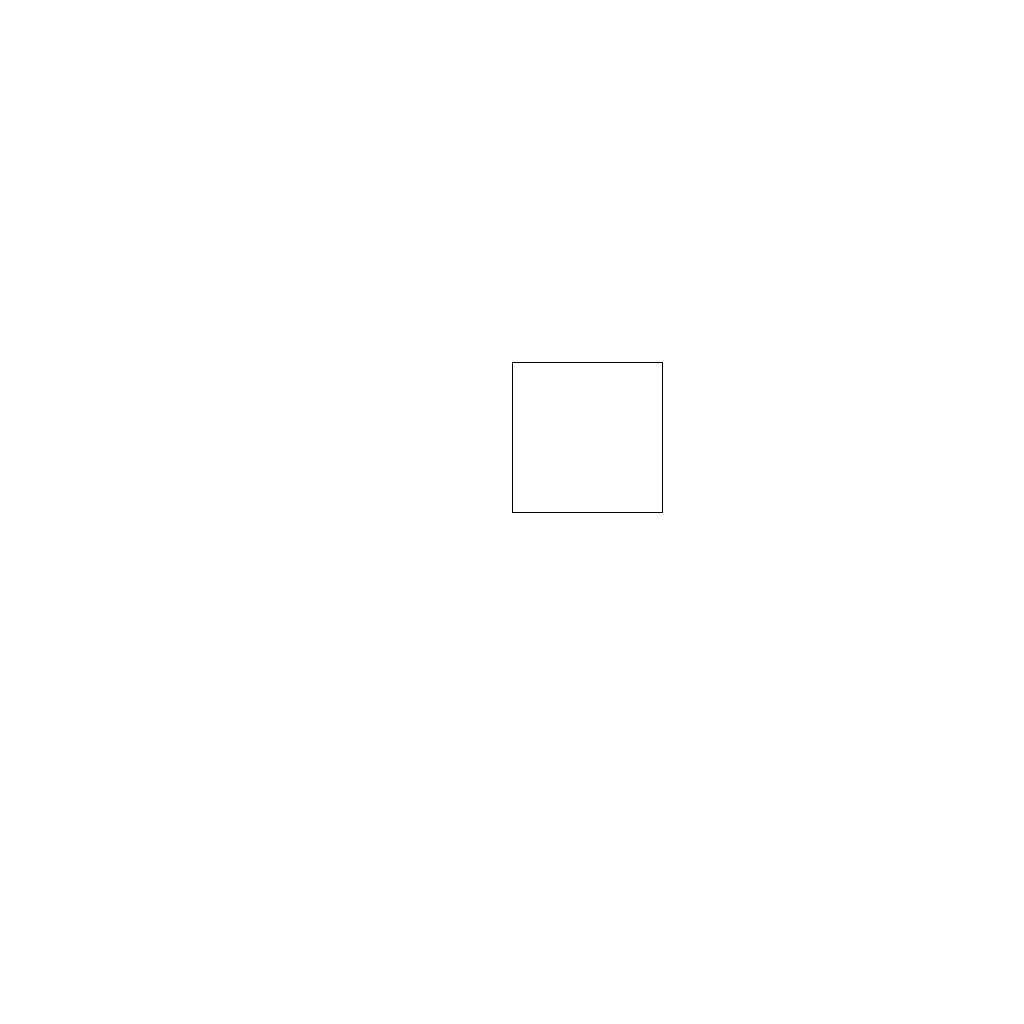

In [41]:
Turtle t = new Turtle();
Rectangle r = new Rectangle(new Point(0, 0), new Point(30, 30));
r.draw(t);
t.toImage();

#### Miniübung
* Implementieren Sie eine Klasse Triangle und eine Klasse Circle
* Implementieren Sie die Klasse Polygon, welche eine beliebige Anzahl Punkte nimmt und diese damit 
* Fügen Sie den Objekten jeweils eine Methode ```scale``` hinzu, welche ein neues Objekt zurückgibt, welches um den angegebenen Faktor vergrössert ist. 
* Fügen Sie den Objekten die Methode ```rotate``` hinzu, welches das Objekt um den 0 Punkt rotiert. 
* Fügen Sie den Objekten jeweils die Methode ```translate```hinzu, welches die Objecte jeweils um einen angegebenen Vektor vershcieben. 